In [1]:
import uns
from uns import training
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
training.columns

Index(['Cc', 'Cr', 'H', 'S0', 'S1', 'V0', 'V1', 'W', 'img', 'lenskel',
       'maxdist', 'meandist', 'medidist', 'moments', 'npixels', 'pixels',
       'subject', 'xmax', 'xmin', 'ymax', 'ymin'],
      dtype='object')

## Images

In [ ]:
img = uns.image_pair(training.iloc[0])
ax = img.image.plot()
img.mask.plot()
img.mask.plot_contour(ax=ax)

In [ ]:
indices = [84, 798, 800, 1270, 1513, 1914, 2221, 2236, 2735, 3062, 3428, 3898, 4157, 4175, 4277, 4296, 5019]
batch = uns.batch(training.iloc[indices])
ax = None
for img in batch:
    ax = img.mask.plot_contour(ax=ax, color='k', alpha=0.5)

In [ ]:
batchsum = np.sum(batch.array, axis=0)
plt.imshow(batchsum, cmap=plt.cm.inferno)

## iterate over all images/masks

In [8]:
batch = uns.batch(training)


In [9]:
dflist = [batch.pop(0).mask.pandas for i in range(len(batch)) ]
newtraining = pd.DataFrame(data=dflist)

/Users/chrisv/anaconda/lib/python3.4/site-packages/skimage/external/tifffile/tifffile.py:1794: RuntimeWarning: py_decodelzw encountered unexpected end of stream
  strip = decompress(strip)


In [11]:
newtraining.head(5)

,Cc,Cr,H,S0,S1,V0,V1,W,img,lenskel,...,meandist,medidist,moments,npixels,pixels,subject,xmax,xmin,ymax,ymin
0,440.251300,124.769064,81.806501,214.510762,133.540231,"[-0.77623613493, 0.630442275573]","[0.630442275573, 0.77623613493]",86.010939,1,129.0,...,11.010182,10.000000,"[[1177080.0, 146863170.0, 18899270430.0, 2.502...",4616.0,168153 9 168570 15 168984 22 169401 26 169818 ...,1,170.008604,83.997665,481.804343,399.997841
1,267.841705,146.818412,77.008820,247.940517,158.752495,"[-0.950471304786, 0.310812320829]","[0.310812320829, 0.950471304786]",108.857344,2,78.0,...,13.228191,12.083046,"[[1609305.0, 236275605.0, 36012171765.0, 5.674...",6311.0,96346 7 96762 16 97179 27 97595 35 98012 40 98...,1,200.001961,91.144617,305.999972,228.991152
2,343.224080,123.212227,104.004589,270.490347,183.423547,"[-0.790130243689, 0.61293898392]","[0.61293898392, 0.790130243689]",112.011536,3,89.0,...,14.819897,13.453624,"[[2043825.0, 251824230.0, 32675209890.0, 4.429...",8015.0,121957 2 122365 26 122784 28 123202 31 123618 ...,1,179.001961,66.990425,395.002487,290.997898
3,295.295555,110.537042,61.002162,172.551507,139.582235,"[-0.996797967863, -0.0799613110473]","[-0.0799613110473, 0.996797967863]",76.031240,4,53.0,...,11.380546,10.000000,"[[980985.0, 108435180.0, 12362646840.0, 1.4504...",3847.0,110980 9 111393 21 111810 33 112228 43 112647 ...,1,151.002101,74.970860,325.001983,263.999821
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN


In [9]:
training['hasmask'] = training['Cc'].notnull()
training.loc[3667,'hasmask'] = False
training.loc[3667]

Cc                                                    150.455
Cr                                                    46.1027
H                                                     352.009
S0                                                        685
S1                                                    80.7737
V0                          [-0.0623351126354, 0.99805527589]
V1                           [0.99805527589, 0.0623351126354]
W                                                     47.9868
img                                                        71
lenskel                                                   370
maxdist                                                    18
meandist                                               6.9523
medidist                                              6.08276
moments     [[2187390.0, 100844595.0, 4872208245.0, 246255...
npixels                                                  8578
pixels      1727 1 2147 5 2566 9 2986 13 3405 17 3824 21 4...
subject 

In [10]:
training.to_msgpack('training.bin')

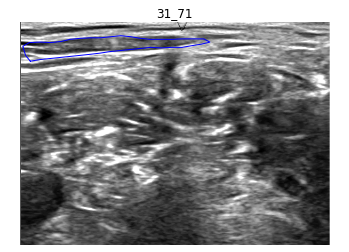

In [12]:
im_idx = 3667
im = uns.image_pair(training.iloc[im_idx])
im.plot()